In [2]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [20]:
#import data
df = pd.read_csv("kc_house_data.csv",sep =',')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Data engeneering "date"

In [16]:
# 1st method : transforme date to format date
date=pd.DatetimeIndex(df.date)

In [17]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year of sale
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


In [18]:
#put the year of date in new colonne "year of sale"
df["year of sale"]=date.year


In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year of sale
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [21]:
#2ème méthode pour séléctionner l'année à partir de la colonne "date"
d=[]
for i in df['date'].values :
    d.append(i[:4])
df['date']=d    

In [22]:
df.rename( columns = {'year of sale': 'date'} ,inplace=True)
df



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [23]:
#convertir les valeurs des colonnes à float
# caculer l'age de la maison
for i in df.columns:
    df[i]=df[i].astype(float)
df["age"]= df["date"]- df["yr_built"]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7.129301e+09,2014.0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0
1,6.414100e+09,2014.0,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0
2,5.631500e+09,2015.0,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0
3,2.487201e+09,2014.0,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0
4,1.954401e+09,2015.0,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.630000e+08,2014.0,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,...,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,5.0
21609,6.600060e+09,2015.0,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,...,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,1.0
21610,1.523300e+09,2014.0,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,...,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,5.0
21611,2.913101e+08,2015.0,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,...,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0,11.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  float64
 1   date           21613 non-null  float64
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  float64
 9   view           21613 non-null  float64
 10  condition      21613 non-null  float64
 11  grade          21613 non-null  float64
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  float64
 14  yr_built       21613 non-null  float64
 15  yr_renovated   21613 non-null  float64
 16  zipcode        21613 non-null  float64
 17  lat            21613 non-null  float64
 18  long  

In [25]:
# l'age de rénovation
df[ "renovate_age"] = df["yr_renovated"]- df["yr_built"]
df["renovate_age"]=df[ "renovate_age"].abs()
df[ "renovate_age"].values

array([1955.,   40., 1933., ..., 2009., 2004., 2008.])

In [27]:
# supprimer les ages qui ont plus de 2 chiffres
df['renovate_age'] = df.renovate_age.apply(lambda x: x if len(str(int(x)))==2 else 0.0)
df[ "renovate_age"].values

array([ 0., 40.,  0., ...,  0.,  0.,  0.])

In [28]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovate_age
0,7.129301e+09,2014.0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0
1,6.414100e+09,2014.0,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0
2,5.631500e+09,2015.0,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0
3,2.487201e+09,2014.0,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0
4,1.954401e+09,2015.0,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0


In [29]:
# supprimer les colonnes qui ne sont pas nécessaires
df.drop(["id","date","yr_built","yr_renovated"], axis = 1, inplace = True)

In [30]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovate_age
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,5.0,0.0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,1.0,0.0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,5.0,0.0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0,11.0,0.0


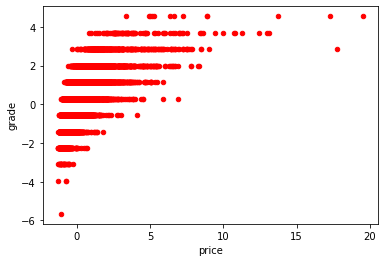

In [104]:
# Data visualization
df.plot(kind='scatter',x='price',y='grade',color='red')
plt.show()
# scatterplot that shows the relationship between the grade and the price 

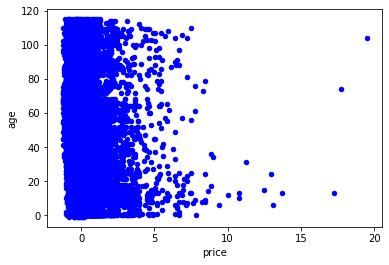

In [121]:
df.plot(kind='scatter',x='price',y='age',color='blue')
plt.show()
# scatterplot that shows the relationship between the age of the house and the price 

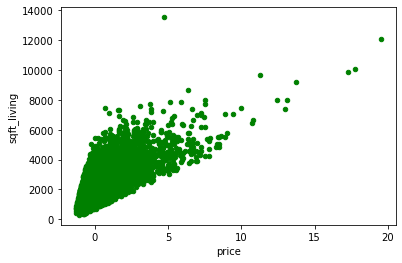

In [123]:
df.plot(kind='scatter',x='price',y='sqft_living',color='green')
plt.show()
# scatterplot that shows the relationship between the square footage of the home and the price 

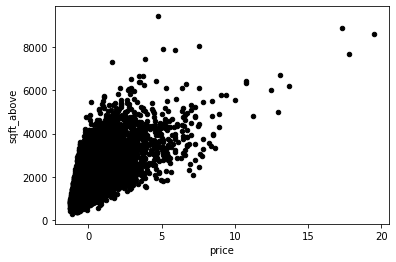

In [125]:
df.plot(kind='scatter',x='price',y='sqft_above',color='black')
plt.show()
# scatterplot that shows the relationship between the square footage of house apart from basement and the price 

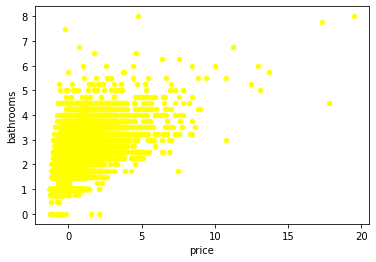

In [128]:
df.plot(kind='scatter',x='price',y='bathrooms',color='yellow')
plt.show()
# scatterplot that shows the relationship between the Number of bathrooms/bedrooms and the price 

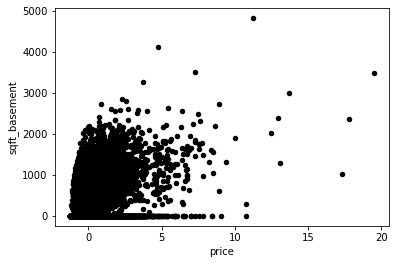

In [134]:
df.plot(kind='scatter',x='price',y='sqft_basement',color='black')
plt.show()
# scatterplot that shows the relationship between the square footage of the basement and the price 

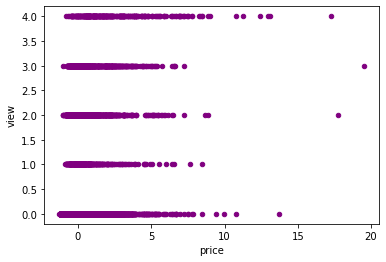

In [130]:
df.plot(kind='scatter',x='price',y='view',color='purple')
plt.show()
# scatterplot that shows the relationship between the number of times that the house has been viewed and the price 

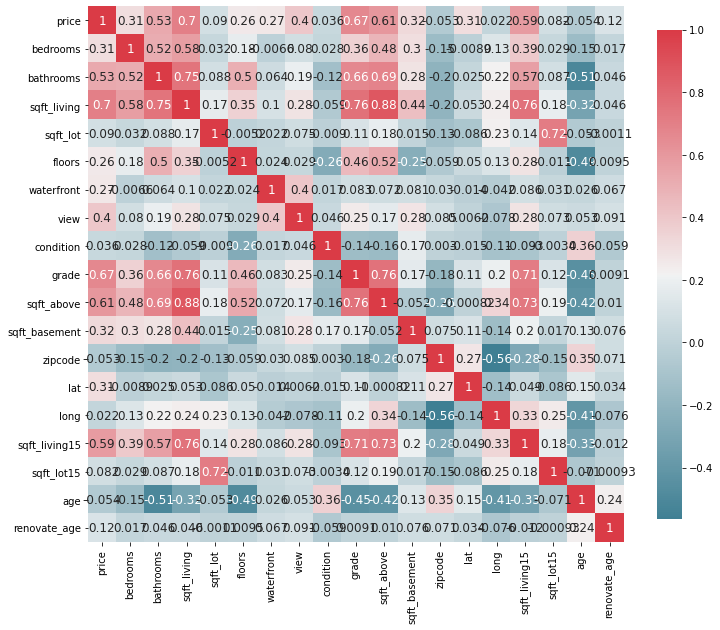

In [133]:
# correlation matrix heatmap
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)


In [ ]:
"""" We can see from the correlation matrix heatmap that 
the features ["grade","sqft_above", "sqft_living","sqft_living15", "bathrooms","view"] are the most important ones 
beacause they have a big impact on the price """

In [31]:
# arrange the dataframe by "price" in descending way
sorted_df = df.sort_values(by = "price", ascending=False )
sorted_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovate_age
7252,7700000.0,6.0,8.00,12050.0,27600.0,2.5,0.0,3.0,4.0,13.0,8570.0,3480.0,98102.0,47.6298,-122.323,3940.0,8800.0,104.0,77.0
3914,7062500.0,5.0,4.50,10040.0,37325.0,2.0,1.0,2.0,3.0,11.0,7680.0,2360.0,98004.0,47.6500,-122.214,3930.0,25449.0,74.0,61.0
9254,6885000.0,6.0,7.75,9890.0,31374.0,2.0,0.0,4.0,3.0,13.0,8860.0,1030.0,98039.0,47.6305,-122.240,4540.0,42730.0,13.0,0.0
4411,5570000.0,5.0,5.75,9200.0,35069.0,2.0,0.0,0.0,3.0,13.0,6200.0,3000.0,98039.0,47.6289,-122.233,3560.0,24345.0,13.0,0.0
1448,5350000.0,5.0,5.00,8000.0,23985.0,2.0,0.0,4.0,3.0,12.0,6720.0,1280.0,98004.0,47.6232,-122.220,4600.0,21750.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,82000.0,3.0,1.00,860.0,10426.0,1.0,0.0,0.0,3.0,6.0,860.0,0.0,98146.0,47.4987,-122.341,1140.0,11250.0,60.0,0.0
16198,81000.0,2.0,1.00,730.0,9975.0,1.0,0.0,0.0,1.0,5.0,730.0,0.0,98168.0,47.4808,-122.315,860.0,9000.0,72.0,0.0
465,80000.0,1.0,0.75,430.0,5050.0,1.0,0.0,0.0,2.0,4.0,430.0,0.0,98014.0,47.6499,-121.909,1200.0,7500.0,102.0,0.0
15293,78000.0,2.0,1.00,780.0,16344.0,1.0,0.0,0.0,1.0,5.0,780.0,0.0,98168.0,47.4739,-122.280,1700.0,10387.0,72.0,0.0


In [32]:
#visualize the relations between the most important features columns of the dataset 
sorted_df[["price", "grade","sqft_above", "sqft_living","sqft_living15", "bathrooms","view"]].groupby(["price"], as_index=True).mean()

,grade,sqft_above,sqft_living,sqft_living15,bathrooms,view
price,,,,,,
75000.0,3.0,670.0,670.0,1160.0,0.00,0.0
78000.0,5.0,780.0,780.0,1700.0,1.00,0.0
80000.0,4.0,430.0,430.0,1200.0,0.75,0.0
81000.0,5.0,730.0,730.0,860.0,1.00,0.0
82000.0,6.0,860.0,860.0,1140.0,1.00,0.0
...,...,...,...,...,...,...
5350000.0,12.0,6720.0,8000.0,4600.0,5.00,4.0
5570000.0,13.0,6200.0,9200.0,3560.0,5.75,0.0
6885000.0,13.0,8860.0,9890.0,4540.0,7.75,4.0


In [94]:
#Split train and test
x=df['grade'].values.reshape(-1,1)
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35% and train size of 65%


In [81]:
# Apply Linear regression 
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data


LinearRegression()

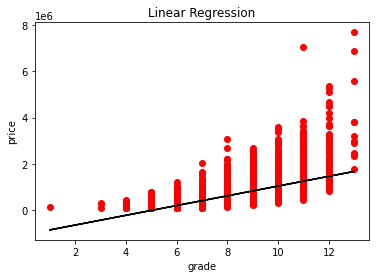

In [82]:
# plot Linear regression 

plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("grade")
plt.plot(x,model.predict(x),color="k")
plt.show()

"""This scatter plot shows that the bigger the grade the higher the price of the house"""

In [83]:
# measure the perfomance test

predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 68216329489.98443
R squared 0.45738411228260756


In [102]:
# Apply multi-linear regression
X=df[["grade","sqft_above", "sqft_living","sqft_living15", "bathrooms","view"]]  #we have more than one input
Y=df["price"].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model2=LinearRegression() #build linear regression model
model2.fit(X_train,Y_train) #fitting the training data

predicted2=model2.predict(X_test) #testing our model’s performance

print("MSE2", mean_squared_error(Y_test,predicted2))
print("R squared2", metrics.r2_score(Y_test,predicted2))

MSE2 52329809274.131744
R squared2 0.5837508976859594


In [ ]:
""""By applying multi-linear regression after linear regression, we can see that the value of the MSE decreased and 
the value of R squared increased which means that the quality of prediction of our model becomes a little better with
the multi_linear regression"""

In [108]:
#Apply Polynomial regression
x=df[["grade","sqft_above", "sqft_living","sqft_living15", "bathrooms","view"]]
y=df["price"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data

lg=LinearRegression()
poly=PolynomialFeatures(degree=3)
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  44863240812.29526
R squared:  0.6431425228937762


In [ ]:
""""After applying Polynomial regression, we can notice that the value of the MSE becomes lower and 
the value of R squared becomes higher which means that the prediction accuracy of our model becomes more better with
the Polynomial regression than with multi_linear regression and linear regression"""